In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv('/content/drive/MyDrive/files/covtype.csv')

In [80]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [81]:
df.shape

(581012, 55)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [83]:
df.isna().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df1=df.copy()
rem_col=[]
for col in df1.columns:
  if df1[col].std()<=0.02:
    rem_col.append(col)
df1.drop(rem_col,axis=1,inplace=True)
print(rem_col)


['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


In [86]:
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [87]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [88]:
df.value_counts().unique()

array([1])

In [89]:
df.apply(lambda x: len(x.unique()))


,0
Elevation,1978
Aspect,361
Slope,67
Horizontal_Distance_To_Hydrology,551
Vertical_Distance_To_Hydrology,700
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,207
Hillshade_Noon,185
Hillshade_3pm,255
Horizontal_Distance_To_Fire_Points,5827


In [90]:
df.apply(np.unique)

,0
Elevation,"[1859, 1860, 1861, 1863, 1866, 1867, 1868, 187..."
Aspect,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Slope,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Horizontal_Distance_To_Hydrology,"[0, 30, 42, 60, 67, 85, 90, 95, 108, 120, 124,..."
Vertical_Distance_To_Hydrology,"[-173, -166, -164, -163, -161, -159, -158, -15..."
Horizontal_Distance_To_Roadways,"[0, 30, 42, 60, 67, 85, 90, 95, 108, 120, 124,..."
Hillshade_9am,"[0, 36, 46, 50, 52, 53, 54, 55, 56, 57, 58, 59..."
Hillshade_Noon,"[0, 30, 40, 42, 45, 53, 63, 64, 68, 71, 74, 75..."
Hillshade_3pm,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Horizontal_Distance_To_Fire_Points,"[0, 30, 42, 60, 67, 85, 90, 95, 108, 120, 124,..."


In [91]:
df.nunique(axis=0)

,0
Elevation,1978
Aspect,361
Slope,67
Horizontal_Distance_To_Hydrology,551
Vertical_Distance_To_Hydrology,700
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,207
Hillshade_Noon,185
Hillshade_3pm,255
Horizontal_Distance_To_Fire_Points,5827


In [92]:
df.value_counts()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type
3858       89      11     785                               82                              4352                             237            222             115            2402                                0                 0                 1                 0                 0           0           0           0           0           0           0           0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            1            7             1
1859       18      12     67                                11                              90                               211            215             139            792                                 0                 0                 0                 1                 0           1           0           0           0           0           0           0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            3             1
1860       18      13     95                                15                              90                               210            213             138            780                                 0                 0                 0                 1                 0           1           0           0           0           0           0           0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            3             1
1861       35      14     60                                11                              85                               218            209             124            832                                 0                 0                 0                 1                 0           1           0           0           0           0           0           0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0   

In [93]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


In [94]:
df['Aspect'].value_counts()

,count
Aspect,
45,6308
0,4914
90,4677
135,3834
63,3680
...,...
269,625
244,587
224,506


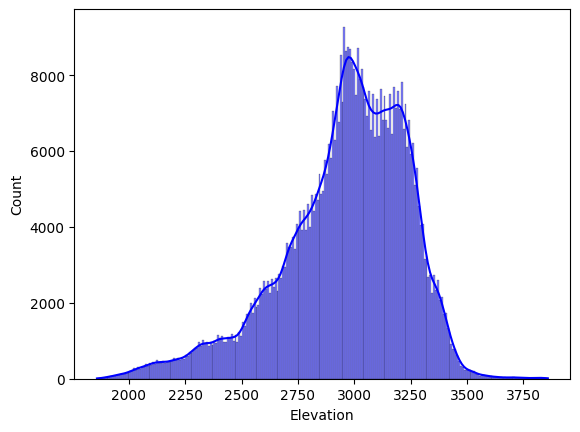

In [95]:
sns.histplot(df['Elevation'] , color = 'b',kde=True);

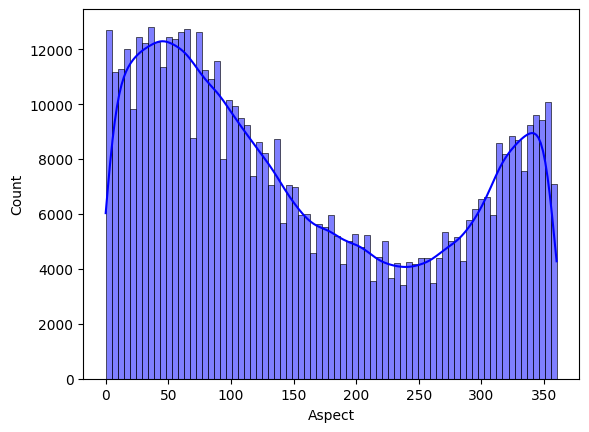

In [96]:
sns.histplot(df['Aspect'] , color = 'b',kde=True);

<Axes: xlabel='Slope', ylabel='Density'>

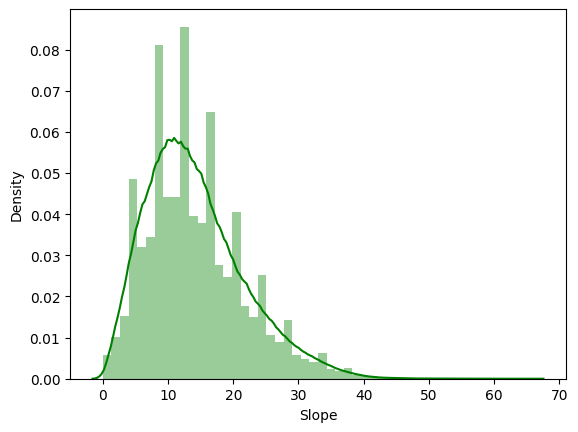

In [97]:
sns.distplot(df['Slope'] , color = 'green')

<Axes: xlabel='Cover_Type'>

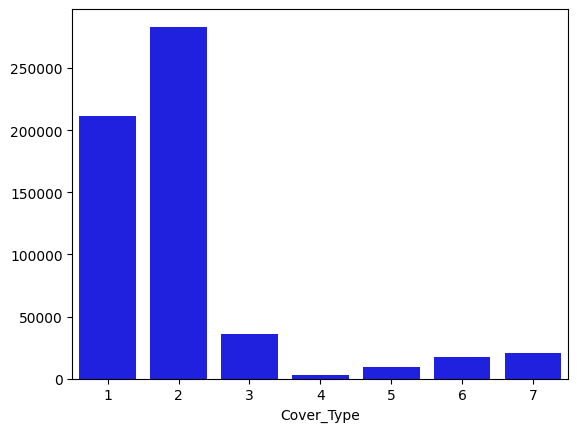

In [98]:
sns.barplot(x=df['Cover_Type'].value_counts().index,
             y=df['Cover_Type'].value_counts().values ,
             color ='b')

<Axes: xlabel='Cover_Type', ylabel='Slope'>

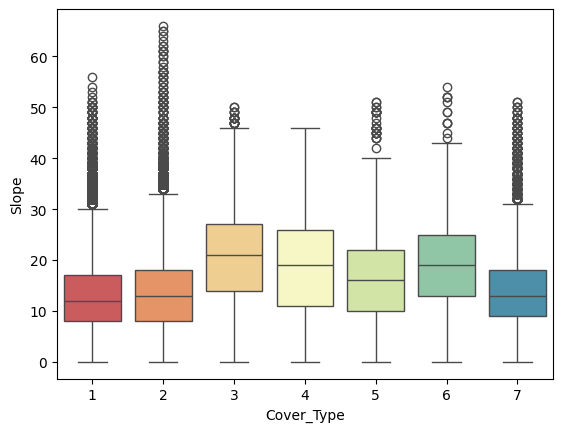

In [99]:
sns.boxplot(x = 'Cover_Type' , y = 'Slope' , data = df , palette = 'Spectral')

<Axes: xlabel='Cover_Type', ylabel='Aspect'>

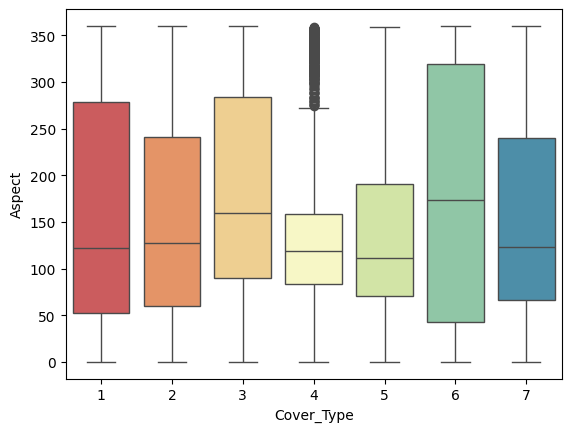

In [100]:
sns.boxplot(x = 'Cover_Type' , y = 'Aspect' , data = df , palette = 'Spectral')

<Axes: xlabel='Cover_Type', ylabel='Elevation'>

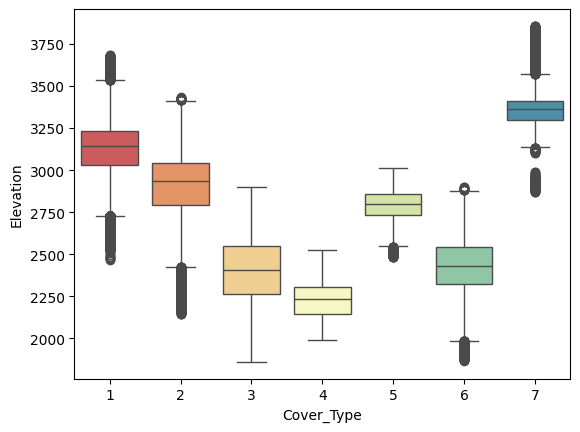

In [101]:
sns.boxplot(x = 'Cover_Type' , y = 'Elevation' , data = df , palette = 'Spectral')

In [102]:
X = df.drop(['Cover_Type'] , axis = 1)


In [103]:
y = df['Cover_Type']


In [104]:
X.shape


(581012, 54)

In [105]:
y.shape

(581012,)

In [106]:
y

,Cover_Type
0,5
1,5
2,2
3,2
4,5
...,...
581007,3
581008,3
581009,3
581010,3


In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

In [108]:
from sklearn.ensemble import RandomForestClassifier


In [109]:
random = RandomForestClassifier()


In [110]:
random.fit(X_train , y_train)

RandomForestClassifier()

In [111]:
random.score(X_test,y_test)


0.9517337525243253

In [112]:
y_pred = random.predict(X_test)


In [113]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.96      0.95     10638
           4       0.91      0.85      0.88       795
           5       0.94      0.76      0.84      2941
           6       0.93      0.90      0.91      5227
           7       0.97      0.95      0.96      6069

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304

